                                          University of Waterloo
                       ECE 657A: Data and Knowledge Modeling and Analysis Winter 2020
                          Classification: Feature Extraction + Classical Methods
------------------------------------------------------------------------------------------------------------------

# Required Libraries

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# 1.1: Explanation of Design and Implementation Choices of your model 


## Multiple Class Classification Problem
Fashion MNIST dataset with a twist has dataset comprised of 60,000 small square 28×28 pixel grayscale images of items with five different types of clothing with the mapping from 0-4.<br>
We used various Classifiers and dimensionality reduction techniques to select a best fitting model

# Preparing the data considering full data

The training data which is loaded from the train.csv file is split into training data set and validation dataset inorder to evaluate the model trained and tune the hyperparameters if need be.We split the  given training data in 8:2 ration for training and validation respectively.The resulting shape of training dataset is 48000(Number of data points) x 784(Number of features) and the validation dataset is 12000x784.<br>
The test data is loaded from testX.csv file and it contains 10000 data points.So the resulting shape of test data on which the prediction is to be done is 10000x784.<br>
The need of the validation data set is that we dont have the classified target value for the test data and inorder to test our trained model we need a dataset for which the prediction is available


In [3]:
#Loading the data
train_data=pd.read_csv('train.csv')
train_data_copy=pd.read_csv('train.csv')
test_data=pd.read_csv('testX.csv')
train_data.drop(train_data.columns[[0]], axis = 1, inplace = True)
X_Data = train_data.iloc[:,1:]
Y_Data= train_data.iloc[:,:1]
X_test= test_data.iloc[:,1:]

In [4]:
print(Y_Data.shape)
print(X_Data.shape)
print(X_test.shape)

(60000, 1)
(60000, 784)
(10000, 784)


### Splitting the whole data into train and validation set

In [5]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_Data, Y_Data, test_size=0.2, random_state = 42)

In [6]:
#1d array
y_val_s=np.ravel(y_val_s)
y_train_s=np.ravel(y_train_s)

# 1.1 
### Scaling the whole data using MinMax normalization and Z-score normalization
### Feature Scaling

MNIST has gray scale images of 28*28 pixels so the pixel can take any value between 0 to 255 and hence we try to normalize or rescale the data to unit dimension so that the value lies between 0-1 which allows the gradient descent to converge faster thereby reducing the training time.

Feature scaling was performed in three ways
1. No normalization 

2. Min-Max Normalization -
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

3. Z-norm Normalization -
 A method by which we subtract the mean from each observation and divide it by the standard deviation
 
Among the three normalization techniques considered no normalization resulted in lesser accuracy because the data was not recentered or scaled causing an unstable model.Whereas, Min-Max Normalization and Z-score Normalization we achieve a better model.Considering the metrics namely accuracy score,Precision score,Recall,F1 score we consider Min-Max Normalization to be the best Scaling algorithm.
 
Inaddition to the above consideration,the normalization technique is applied only to distance based classifiers as the tree based classifier or the ensemble methods doesnt need a distance metric for classification rather it depends on the decision rules,or adaptive learning techniques.


In [7]:
#Normalizing the data using minmax- normalization
X_train_mima_s = X_train_s.astype("float32")/255
X_val_mima_s= X_val_s.astype("float32")/255
X_test_mima_s=X_test.astype("float32")/255

#Normalizing the data using z-score normalization
stdScaler = StandardScaler().fit(X_train_s)
X_train_z_s = stdScaler.transform(X_train_s)
X_val_z_s = stdScaler.transform(X_val_s)
X_test_z=stdScaler.transform(X_test)

# Preparing Data considering 10000 data points

We have initially took a subset of the given training data set to find out the best classifier as working on 60000 data points is time and memory consuming. 

In [8]:
# Considering 10000 datapoints for choosing the classifier
Y_Data_10= train_data.iloc[0:10000,:1]
X_Data_10 = train_data.iloc[0:10000,1:]

### Shuffling

In the process of preparing our dataset for training we are introducing shuffling technique inorder to ensure that we are working on uniform samples.

### Splitting the 10000 data points into train and validation set

In [9]:
#Splitting the data into train and validate 
ran = 42
X_train, X_val, y_train, y_val = train_test_split(X_Data_10, Y_Data_10, test_size=0.2, random_state = ran)
#shuffling
X_train, y_train= shuffle(X_train, y_train, random_state=42)

In [10]:
#1d array
y_val=np.ravel(y_val)
y_train=np.ravel(y_train)

### Scaling the 10000 data points using MinMax Normalization and Z-score Normalization

In [11]:
#Normalizing the data using minmax- normalization
X_train_mima = X_train.astype("float32")/255
X_val_mima= X_val.astype("float32")/255
X_test_mima=X_test.astype("float32")/255

#Normalizing the data using z-score normalization
stdScaler = StandardScaler().fit(X_train)
X_train_z = stdScaler.transform(X_train)
X_val_z = stdScaler.transform(X_val)
X_test_z = stdScaler.transform(X_test)

 # 1.1 CLASSIFICATION

There are two strategies in multiclass classification namely One-versus-all (OvA) strategy and One-versus-one (OvO) strategy.SkLearn by default uses OvA strategy.

In OvA strategy, to create a system that can classify the digit images into 5 classes (from 0 to 4), we train 5 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on).we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score.

The Classification methods we have considered are based on the problem type (multi-class classification):
-- SGDClassifier<br>
-- Decision Tree Classifier<br>
-- Random Forest Classifier<br>
-- Gradient Boosting<br>
-- XGBoosting<br>
-- SVM Classifier<br>
-- KNN Classifier<br>

We start off with the SGDClassifier (Multi class classifier as it converges faster and avoids the probelm of vanishing gradient)

# Steps Followed to Choose the best Classifier
-- A sample of the data is considered to choose the classifier<BR>
-- Analysis is done to check whether scaling needs to be applied to all the classifier, as normalized data is not required for tree based classifiers.<BR>
-- Different values of parameters is applied on each type of classifier<BR>
-- The best parameter values are deduced using classification metrics such as accuracy score, precision score, recall, f1 Score and ROC.<BR>
-- The optimal parameter value found are applied and time is calcuted to train and validate the data.<BR>
-- Time and Parameter Analysis will produce a optimal classifier of this data.<BR>

## 1.1 SGDClassifier-- No Normalization (Working and Reason to choose)
SGD Classifier effectively classifies by combining multiple binary classifiers following the OVA strategy.For each of the K classes a binary classifier is learned that discriminates between the current class and the K-1 classes.At the end we choose the label with the highest confidence value.

It is easy to implement and is efficient.

In [18]:
%%time
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train)

CPU times: user 8.74 s, sys: 1.77 ms, total: 8.75 s
Wall time: 8.75 s
time: 8.75 s


In [19]:
%%time
y_train_predict = sgd_clf.predict(X_val)

CPU times: user 18.9 ms, sys: 1.06 ms, total: 19.9 ms
Wall time: 21.1 ms
time: 23.4 ms


In [20]:
%%time
sgd_accuracy = accuracy_score(y_val, y_train_predict)
sgd_precision = precision_score(y_val, y_train_predict, average='weighted')
sgd_recall = recall_score(y_val, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_val, y_train_predict, average='weighted')

CPU times: user 10 ms, sys: 7.01 ms, total: 17 ms
Wall time: 12.2 ms
time: 15.2 ms


In [21]:
print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.4795
SGD Precision:  0.5750071084244457
SGD Recall:  0.5750071084244457
SGD F1 Score:  0.4762816852881703
time: 1.72 ms


## SGDClassifier_minmax


In [22]:
%%time
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_mima, y_train)

CPU times: user 6.44 s, sys: 936 µs, total: 6.44 s
Wall time: 6.45 s
time: 6.45 s


In [23]:
%%time
y_train_predict = sgd_clf.predict(X_val_mima)

CPU times: user 14.8 ms, sys: 1.61 ms, total: 16.4 ms
Wall time: 13.4 ms
time: 14.7 ms


In [24]:
%%time
sgd_accuracy = accuracy_score(y_val, y_train_predict)
sgd_precision = precision_score(y_val, y_train_predict, average='weighted')
sgd_recall = recall_score(y_val, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_val, y_train_predict, average='weighted')

CPU times: user 7.28 ms, sys: 57 µs, total: 7.34 ms
Wall time: 8.36 ms
time: 10.6 ms


In [25]:
print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.6315
SGD Precision:  0.6394698061174326
SGD Recall:  0.6394698061174326
SGD F1 Score:  0.6056822925175168
time: 1.44 ms


## SGDClassifier_z_score


In [26]:
%%time
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_z, y_train)

CPU times: user 14.3 s, sys: 1.34 ms, total: 14.3 s
Wall time: 14.3 s
time: 14.3 s


In [27]:
%%time
y_train_predict = sgd_clf.predict(X_val_z)

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 7.16 ms
time: 9.46 ms


In [28]:
sgd_accuracy = accuracy_score(y_val, y_train_predict)
sgd_precision = precision_score(y_val, y_train_predict, average='weighted')
sgd_recall = recall_score(y_val, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_val, y_train_predict, average='weighted')


print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.607
SGD Precision:  0.6155929418205236
SGD Recall:  0.6155929418205236
SGD F1 Score:  0.609496352332707
time: 13 ms


## 1.1 Decision Tree Classifier (Working and Reason to choose)

It is a non-parametric supervised machine learning algorithm used for classification. It splits the datasets into different classes based on different decision rules (IF & ELSE rules).The classification is done recursively.

The test data goes through the tree from the root node and learns the decision rules obtained from the training data identifies the best fit for itself.

It is a greedy classifier plus needs no preprocessing of data.Because of these aspects it is less time consuming even when acted on a large dataset.The main tuning parameter here is the depth of the tree.


In [29]:
%%time
depth_value=[3,5,10,15,20,25,30,35,40,45,50,55,60,65]
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
for i in depth_value:
    dec_tree_clf=tree.DecisionTreeClassifier(random_state=42,max_depth=i)
    dec_tree_clf.fit(X_train, y_train)
    y_train_predict = dec_tree_clf.predict(X_val)
    dec_tree_accuracy = accuracy_score(y_val, y_train_predict)
    dec_tree_precision = precision_score(y_val, y_train_predict, average='weighted')
    dec_tree_recall = recall_score(y_val, y_train_predict, average='weighted')
    dec_tree_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    accuracy_list.append(dec_tree_accuracy)
    precion_list.append(dec_tree_precision)
    recall_list.append(dec_tree_recall)
    f1_score_list.append(dec_tree_f1_score)
print("Decision Tree Accuracies:",accuracy_list)
print("Decision Tree Precision:",precion_list)
print("Decision Tree recall:",recall_list)
print("Decision Tree f1_score:",f1_score_list)

Decision Tree Accuracies: [0.534, 0.6005, 0.651, 0.657, 0.6545, 0.647, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475]
Decision Tree Precision: [0.5810186779234178, 0.6062561087701767, 0.6552159724787032, 0.661167585502276, 0.6590636367737707, 0.6519082087851428, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334, 0.6541798953863334]
Decision Tree recall: [0.534, 0.6005, 0.651, 0.657, 0.6545, 0.647, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475, 0.6475]
Decision Tree f1_score: [0.5409705375665802, 0.5991432706610522, 0.6525463987150096, 0.6587988938556707, 0.6564310434593255, 0.6488872840504, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212, 0.6502423602862212]
CPU times: user 44.6 s, sys: 8.38 ms, total: 44.6 s
Wall time: 44.6 s
time: 44.6 s


#### Calculating Time for the best Decision Tree Parameters

In [30]:
%%time
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=15, random_state=42)
dec_tree_clf.fit(X_train, y_train)

CPU times: user 3.24 s, sys: 864 µs, total: 3.25 s
Wall time: 3.25 s
time: 3.25 s


In [31]:
%%time
y_train_predict = dec_tree_clf.predict(X_val)

CPU times: user 7.33 ms, sys: 987 µs, total: 8.32 ms
Wall time: 9.13 ms
time: 11.2 ms


In [32]:
dec_tree_accuracy = accuracy_score(y_val, y_train_predict)
dec_tree_precision = precision_score(y_val, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_val, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_val, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  0.657
Decision Tree Precision:  0.661167585502276
Decision Tree Recall:  0.661167585502276
Decision Tree F1 Score:  0.6587988938556707
time: 13.1 ms


## 1.1 Random Forest Classifier (Working and Reason to choose)

It is one of the ensemble methods where we combine the predictions of several base estimators built with a given learning algorithm in order to improve robustness over a single estimator.

Each tree in the ensemble is built from a sample drawn with replacement from the training set. When splitting each node the best split is found either from all input features or a random subset (reduced features)

Random forest achieves a reduced variance by combining diverse trees at the cost of increased bias but better accuracy.The main tuning parameter here is the number of trees and the depth of the trees.Random forest is built recursively and it uses boostrap technique to build the model.
The random forest combines the result of accuracy of multiple decision trees by taking the average at the end of the process. 


In [38]:
%%time
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
tree_list=[5, 10, 50, 150, 200,250,300] 
Depth=[5, 10, 15, 25,30,35,40,45,50,55,60,65,70]
max_accuracy=0 
for i in tree_list:
    accuracy_list=[]   
    for n in Depth:
        Ran_F=RandomForestClassifier(n_estimators=i ,max_depth=n, random_state = 42)
        Ran_F.fit(X_train, y_train)
        y_train_predict = Ran_F.predict(X_val)
        Ran_F_accuracy = accuracy_score(y_val, y_train_predict)
        Ran_F_precision = precision_score(y_val, y_train_predict, average='weighted')
        Ran_F_recall = recall_score(y_val, y_train_predict, average='weighted')
        Ran_F_f1_score = f1_score(y_val, y_train_predict, average='weighted')
        accuracy_list.append(Ran_F_accuracy)
        precion_list.append(Ran_F_precision)
        recall_list.append(Ran_F_recall)
        f1_score_list.append(Ran_F_f1_score)
        if(Ran_F_accuracy>max_accuracy):
            max_accuracy = Ran_F_accuracy
            optimal_tree = i
            optimal_depth = n
print("Random Forest Accuracies:",accuracy_list)
print("Random Forest Precision:",precion_list)
print("Random Forest recall:",recall_list)
print("Random Forest f1_score:",f1_score_list)       

Random Forest Accuracies: [0.7145, 0.7895, 0.8095, 0.8105, 0.812, 0.8125, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813, 0.813]
Random Forest Precision: [0.654909981872323, 0.7235869876993414, 0.7311861265488269, 0.7194892465392236, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.7212984807359336, 0.6818853141921594, 0.762722455641195, 0.7688081363815372, 0.749633870260995, 0.7574482992951849, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7580408682259844, 0.7115138484349313, 0.7807873951822871, 0.7933185437819255, 0.7989260667293827, 0.7943636626029852, 0.798753974002813, 0.7981568574943194, 0.7981568574943194, 0.7981568574943194, 0.7981568574943194, 0.7981568574943194, 0.7981568574943194, 0.7981568574943194, 0.717835456166214, 0.7976026163878898, 0.8030001993145295, 0.81049036610618

In [39]:
print(optimal_tree,optimal_depth)

150 35
time: 1.33 ms


In [40]:
%%time
Ran_F=RandomForestClassifier(n_estimators=150 ,max_depth=35, random_state = 42)
Ran_F.fit(X_train, y_train)

CPU times: user 12.5 s, sys: 5 ms, total: 12.5 s
Wall time: 12.6 s
time: 12.6 s


In [41]:
%%time
y_train_predict = Ran_F.predict(X_val)

CPU times: user 93.5 ms, sys: 998 µs, total: 94.5 ms
Wall time: 95.3 ms
time: 96.8 ms


In [42]:
Ran_F_accuracy = accuracy_score(y_val, y_train_predict)
Ran_F_precision = precision_score(y_val, y_train_predict, average='weighted')
Ran_F_recall = recall_score(y_val, y_train_predict, average='weighted')
Ran_F_f1_score = f1_score(y_val, y_train_predict, average='weighted')
        
        
print("Random Forest Accuracy:",Ran_F_accuracy)
print("Random Forest Precision:",Ran_F_precision)
print("Random Forest recall:",Ran_F_recall)
print("Random Forest f1_score:",Ran_F_f1_score)       

Random Forest Accuracy: 0.8155
Random Forest Precision: 0.8180186378762343
Random Forest recall: 0.8155
Random Forest f1_score: 0.8165266920577451
time: 13.5 ms


## 1.1GradientBoosting (Working and Reason to choose)
Gradient boosting classifier in general combines weak learning models to form a strong predictive model.Here the weak learners are considered to be the decision trees and the gradient boosting classifier uses the decision trees and combines them.

Generally higher the number of trees-->better the model but increasing the trees even further-->slows down the training-->leads to overfitting
So when we reach a point that gives the best accuracy , we consider that as the optimal value.So,the tuning parameter here is the number of estimators.

Gradient boosting is an ensemble method that learns adaptively leading to better acuracy.In contrast to the Random forest classifier gradient tree boosting combines the results along the way which would help the weak learning decision tree to improvise.

In [43]:
%%time
estimators = [5, 10, 50, 150, 200,250,300]
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
for i in estimators:
    gb_tree_clf=GradientBoostingClassifier(random_state=42,n_estimators=i)
    gb_tree_clf.fit(X_train, y_train)
    y_train_predict = gb_tree_clf.predict(X_val)
    gb_tree_accuracy = accuracy_score(y_val, y_train_predict)
    gb_tree_precision = precision_score(y_val, y_train_predict, average='weighted')
    gb_tree_recall = recall_score(y_val, y_train_predict, average='weighted')
    gb_tree_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    accuracy_list.append(gb_tree_accuracy)
    precion_list.append(gb_tree_precision)
    recall_list.append(gb_tree_recall)
    f1_score_list.append(gb_tree_f1_score)
print("Gradient Boosting Accuracies:",accuracy_list)
print("Gradient Boosting Precision:",precion_list)
print("Gradient Boosting recall:",recall_list)
print("Gradient Boosting f1_score:",f1_score_list)  

Gradient Boosting Accuracies: [0.6555, 0.6735, 0.751, 0.784, 0.7885, 0.7965, 0.795]
Gradient Boosting Precision: [0.6558271632621597, 0.6747382818185386, 0.753952766714476, 0.7850914597180669, 0.789778669345143, 0.7979262709897389, 0.7960190429589292]
Gradient Boosting recall: [0.6555, 0.6735, 0.751, 0.784, 0.7885, 0.7965, 0.795]
Gradient Boosting f1_score: [0.6529354648493533, 0.6721276314938834, 0.7520005552055925, 0.7844347405551796, 0.7890593767992967, 0.7971311586776627, 0.7954563571822783]
CPU times: user 54min 41s, sys: 314 ms, total: 54min 41s
Wall time: 54min 42s
time: 54min 42s


In [44]:
%%time
gb_tree_clf=GradientBoostingClassifier(random_state=42,n_estimators=200)
gb_tree_clf.fit(X_train, y_train)

CPU times: user 11min 17s, sys: 75 ms, total: 11min 17s
Wall time: 11min 17s
time: 11min 17s


In [45]:
%%time
y_train_predict = dec_tree_clf.predict(X_val)

CPU times: user 5.93 ms, sys: 0 ns, total: 5.93 ms
Wall time: 5.94 ms
time: 10.2 ms


In [46]:
gb_tree_accuracy = accuracy_score(y_val, y_train_predict)
gb_tree_precision = precision_score(y_val, y_train_predict, average='weighted')
gb_tree_recall = recall_score(y_val, y_train_predict, average='weighted')
gb_tree_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    
    
print("Gradient Boosting Accuracy:",gb_tree_accuracy)
print("Gradient Boosting Precision:",gb_tree_precision)
print("Gradient Boosting recall:",gb_tree_recall)
print("Gradient Boosting f1_score:",gb_tree_f1_score)  

Gradient Boosting Accuracy: 0.657
Gradient Boosting Precision: 0.661167585502276
Gradient Boosting recall: 0.657
Gradient Boosting f1_score: 0.6587988938556707
time: 10.9 ms


## 1.1 SVM Classifier + No Normalization (Working and Reason to choose)
It is a supervised machine learning algorithm used for classification. It has the ability to handle multiple continuous and categorical variables.

It divides the datasets in to classes to find maximum marginal hyper plane. First SVM iteratively generates a hyperplane that segregates the classes.Later it will choose the hyperplane that separates the classes correctly.

The main advantage of using SVM classifier is that it provides a great accuracy when worked on a high dimensional space(Kernel takes care of transforming the data to a higher dimensional space)


In [48]:
%%time
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
C_value = [10, 15, 20,25,30,35,40]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(X_train, y_train)
    y_train_predict = clf.predict(X_val)
    svm_accuracy = accuracy_score(y_val, y_train_predict)
    svm_precision = precision_score(y_val, y_train_predict, average='weighted')
    svm_recall = recall_score(y_val, y_train_predict, average='weighted')
    svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    accuracy_list.append(svm_accuracy)
    precion_list.append(svm_precision)
    recall_list.append(svm_recall)
    f1_score_list.append(svm_f1_score)
print("SVM Accuracies:",accuracy_list)
print("SVM Precision:",precion_list)
print("SVM recall:",recall_list)
print("SVM f1_score:",f1_score_list)  

SVM Accuracies: [0.828, 0.8305, 0.827, 0.8245, 0.8245, 0.823, 0.822]
SVM Precision: [0.8279021830187419, 0.8305461012274217, 0.8268814738671051, 0.8244216474623923, 0.824664461299934, 0.8231315739032268, 0.8219510332713598]
SVM recall: [0.828, 0.8305, 0.827, 0.8245, 0.8245, 0.823, 0.822]
SVM f1_score: [0.8279070082376997, 0.8304836925989096, 0.8268718506213079, 0.8243047122931405, 0.8245032318525687, 0.8229554121555777, 0.8218628342526606]
CPU times: user 4min 19s, sys: 15 ms, total: 4min 19s
Wall time: 4min 19s
time: 4min 19s


In [49]:
%%time
clf = svm.SVC(kernel='rbf',C=15).fit(X_train, y_train)

CPU times: user 25.9 s, sys: 5 ms, total: 25.9 s
Wall time: 25.9 s
time: 25.9 s


In [50]:
%%time
y_train_predict = clf.predict(X_val)

CPU times: user 9.4 s, sys: 3 ms, total: 9.4 s
Wall time: 9.41 s
time: 9.41 s


In [51]:
svm_accuracy = accuracy_score(y_val, y_train_predict)
svm_precision = precision_score(y_val, y_train_predict, average='weighted')
svm_recall = recall_score(y_val, y_train_predict, average='weighted')
svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    
print("SVM Accuracy:",svm_accuracy)
print("SVM Precision:",svm_precision)
print("SVM recall:",svm_recall)
print("SVM f1_score:",svm_f1_score)  

SVM Accuracy: 0.8305
SVM Precision: 0.8305461012274217
SVM recall: 0.8305
SVM f1_score: 0.8304836925989096
time: 11.3 ms


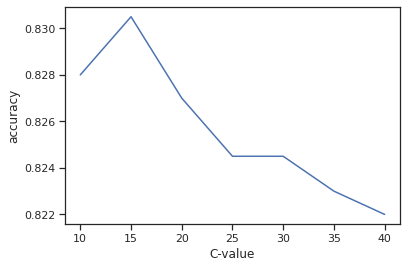

time: 143 ms


In [52]:
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()

## SVM Classifier + Z-score

In [53]:
%%time
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
C_value = [10, 15, 20,25,30,35,40]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(X_train_z, y_train)
    y_train_predict = clf.predict(X_val_z)
    svm_accuracy = accuracy_score(y_val, y_train_predict)
    svm_precision = precision_score(y_val, y_train_predict, average='weighted')
    svm_recall = recall_score(y_val, y_train_predict, average='weighted')
    svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    accuracy_list.append(svm_accuracy)
    precion_list.append(svm_precision)
    recall_list.append(svm_recall)
    f1_score_list.append(svm_f1_score)
print("SVM Accuracies:",accuracy_list)
print("SVM Precision:",precion_list)
print("SVM recall:",recall_list)
print("SVM f1_score:",f1_score_list)  

SVM Accuracies: [0.8355, 0.827, 0.83, 0.8235, 0.825, 0.8255, 0.8255]
SVM Precision: [0.8351693236596025, 0.8266594035396214, 0.8294044970884915, 0.8230227725195259, 0.8245175986870724, 0.8250391658077862, 0.8250783040035278]
SVM recall: [0.8355, 0.827, 0.83, 0.8235, 0.825, 0.8255, 0.8255]
SVM f1_score: [0.8353108155821474, 0.8267297221336235, 0.8295363330613718, 0.8230649706408337, 0.8245943579570988, 0.8250926078081434, 0.8251484381675388]
CPU times: user 4min 36s, sys: 38 ms, total: 4min 36s
Wall time: 4min 37s
time: 4min 37s


In [58]:
%%time
clf = svm.SVC(kernel='rbf',C=10,random_state=42).fit(X_train_z, y_train)

CPU times: user 29.7 s, sys: 5 ms, total: 29.7 s
Wall time: 29.7 s
time: 29.7 s


In [59]:
%%time
y_train_predict = clf.predict(X_val_z)

CPU times: user 10.2 s, sys: 3 ms, total: 10.2 s
Wall time: 10.2 s
time: 10.2 s


In [60]:
svm_accuracy = accuracy_score(y_val, y_train_predict)
svm_precision = precision_score(y_val, y_train_predict, average='weighted')
svm_recall = recall_score(y_val, y_train_predict, average='weighted')
svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    
print("SVM Accuracy:",svm_accuracy)
print("SVM Precision:",svm_precision)
print("SVM recall:",svm_recall)
print("SVM f1_score:",svm_f1_score)  

SVM Accuracy: 0.8355
SVM Precision: 0.8351693236596025
SVM recall: 0.8355
SVM f1_score: 0.8353108155821474
time: 13.1 ms


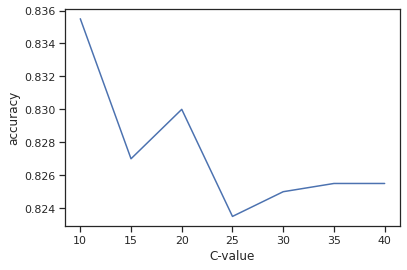

time: 133 ms


In [61]:
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()

## SVM + MinMax

In [62]:
%%time
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
C_value = [10, 15, 20,25,30,35,40]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(X_train_mima, y_train)
    y_train_predict = clf.predict(X_val_mima)
    svm_accuracy = accuracy_score(y_val, y_train_predict)
    svm_precision = precision_score(y_val, y_train_predict, average='weighted')
    svm_recall = recall_score(y_val, y_train_predict, average='weighted')
    svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    accuracy_list.append(svm_accuracy)
    precion_list.append(svm_precision)
    recall_list.append(svm_recall)
    f1_score_list.append(svm_f1_score)
print("SVM Accuracies:",accuracy_list)
print("SVM Precision:",precion_list)
print("SVM recall:",recall_list)
print("SVM f1_score:",f1_score_list)  

SVM Accuracies: [0.828, 0.8305, 0.827, 0.8245, 0.8245, 0.823, 0.822]
SVM Precision: [0.8279021830187419, 0.8305461012274217, 0.8268814738671051, 0.8244216474623923, 0.824664461299934, 0.8231315739032268, 0.8219510332713598]
SVM recall: [0.828, 0.8305, 0.827, 0.8245, 0.8245, 0.823, 0.822]
SVM f1_score: [0.8279070082376997, 0.8304836925989096, 0.8268718506213079, 0.8243047122931405, 0.8245032318525687, 0.8229554121555777, 0.8218628342526606]
CPU times: user 4min 3s, sys: 19 ms, total: 4min 3s
Wall time: 4min 3s
time: 4min 3s


In [63]:
%%time
clf = svm.SVC(kernel='rbf',C=10,random_state=42).fit(X_train_mima, y_train)

CPU times: user 25.7 s, sys: 4 ms, total: 25.7 s
Wall time: 25.7 s
time: 25.7 s


In [64]:
%%time
y_train_predict = clf.predict(X_val_mima)

CPU times: user 9.21 s, sys: 999 µs, total: 9.21 s
Wall time: 9.22 s
time: 9.22 s


In [65]:
svm_accuracy = accuracy_score(y_val, y_train_predict)
svm_precision = precision_score(y_val, y_train_predict, average='weighted')
svm_recall = recall_score(y_val, y_train_predict, average='weighted')
svm_f1_score = f1_score(y_val, y_train_predict, average='weighted')
    
print("SVM Accuracy:",svm_accuracy)
print("SVM Precision:",svm_precision)
print("SVM recall:",svm_recall)
print("SVM f1_score:",svm_f1_score)  

SVM Accuracy: 0.828
SVM Precision: 0.8279021830187419
SVM recall: 0.828
SVM f1_score: 0.8279070082376997
time: 11.9 ms


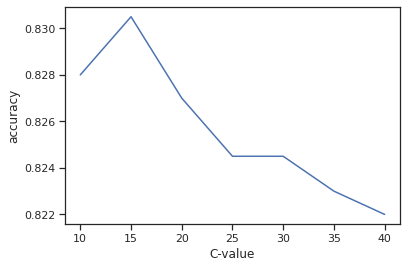

time: 118 ms


In [66]:
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()

## 1.1 XGB Classifier (Working and Reason to choose)
XGB Classifier is one of the ensemble methods that promotes parallel tree boosting where the errors made by the previous model is being corrected by the succession models and thus the finally trained model evolves to an optimized and efficient classifier to predict the labels.

The main tuning parameters considered in this model is the number of estimators and the depth of the tree.

In [0]:
%%time
accuracy_list=[]
precion_list=[]
recall_list=[]
f1_score_list=[]
estimators=[5, 10, 50, 150, 200,250,300] 
Depth=[5, 10, 15, 25,30,35,40]
max_accuracy=0 
for i in estimators:
    accuracy_list=[]   
    for n in Depth:
        XGB=XGBClassifier(n_estimators=i ,max_depth=n, random_state = 42)
        XGB.fit(X_train, y_train)
        y_train_predict = XGB.predict(X_val)
        XGB_accuracy = accuracy_score(y_val, y_train_predict)
        XGB_precision = precision_score(y_val, y_train_predict, average='weighted')
        XGB_recall = recall_score(y_val, y_train_predict, average='weighted')
        XGB_f1_score = f1_score(y_val, y_train_predict, average='weighted')
        accuracy_list.append(XGB_accuracy)
        precion_list.append(XGB_precision)
        recall_list.append(XGB_recall)
        f1_score_list.append(XGB_f1_score)
        if(XGB_accuracy>max_accuracy):
            max_accuracy = XGB_accuracy
            optimal_tree = i
            optimal_depth = n
print("XGB Classifier Accuracies:",accuracy_list)
print("XGB Classifier  Precision:",precion_list)
print("XGB Classifier  recall:",recall_list)
print("XGB Classifier  f1_score:",f1_score_list)       

XGB Classifier Accuracies: [0.8145, 0.813, 0.8185, 0.811, 0.812, 0.818, 0.8105]
XGB Classifier  Precision: [0.7036272205775709, 0.7429637350846013, 0.7596685735934361, 0.7436512745624424, 0.7561732615526628, 0.7531327252614095, 0.7529922450984837, 0.7380478596848128, 0.7634495815358805, 0.782226664568328, 0.7823463081242255, 0.7727512655131229, 0.7792395365421598, 0.7800680909130437, 0.7952749813241317, 0.8018187438330338, 0.8108592909485296, 0.7981657384892282, 0.8063676687020521, 0.8043674334593188, 0.8009183418412515, 0.8169775847027613, 0.8129556253693078, 0.8153655866318683, 0.8066037993634848, 0.8121029445294278, 0.8158059430044344, 0.8066409299372951, 0.8193169296952542, 0.8129980352190249, 0.817630216796863, 0.8067118666427833, 0.8180028070188105, 0.8162201547940924, 0.8102924327564334, 0.8170624115243782, 0.8130334167894558, 0.8158026586747432, 0.8068936009337465, 0.814203073864533, 0.8173698477392081, 0.8103067648385843, 0.8147438873170942, 0.8129021244666681, 0.8182620255284

In [0]:
print(optimal_tree,optimal_depth)

200 5


In [15]:
%%time
XGB=XGBClassifier(n_estimators=200 ,max_depth=5, random_state = 42)
XGB.fit(X_train, y_train)

CPU times: user 7min 37s, sys: 15.7 s, total: 7min 53s
Wall time: 2min 16s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [16]:
%%time
y_train_predict = XGB.predict(X_val)

CPU times: user 450 ms, sys: 139 ms, total: 588 ms
Wall time: 232 ms


In [17]:
XGB_accuracy = accuracy_score(y_val, y_train_predict)
XGB_precision = precision_score(y_val, y_train_predict, average='weighted')
XGB_recall = recall_score(y_val, y_train_predict, average='weighted')
XGB_f1_score = f1_score(y_val, y_train_predict, average='weighted')
        
print("XGB Classifier Accuracy:",XGB_accuracy)
print("XGB Classifier  Precision:",XGB_precision)
print("XGB Classifier  recall:",XGB_recall)
print("XGB Classifier  f1_score:",XGB_f1_score)       

XGB Classifier Accuracy: 0.8185
XGB Classifier  Precision: 0.8193169296952542
XGB Classifier  recall: 0.8185
XGB Classifier  f1_score: 0.818821688594535


## 1.1  KNN 

#### Working and Reason to choose
It is a non parametric supervised machine learning algorithm used for classification and regression predictive problems. The data point will be assigned a particular label based on how closely it matches the points in the training set (This phenomenon is called feature similarity)
Working:
We load the dataset and we choose a particular K value. Later we consider either one of the following distance metrics(EUCLIDEAN,MANHATTAN)  and calculate the distance between the test data and each row of the training data. We sort these distances obtained in ascending order and chose the top K rows. Based on the most frequent number of classes obtained in these rows the test data point will be classified.

The tuning parameters in KNN are K value and the distance function. We have considered values k value from 0 to 50 in the interval of 5 and weights as uniform,manhattan and Euclidean.

In [15]:
%%time
n_neighborslist = [10, 15, 20, 25, 30, 35, 40, 45, 50]
col_names=['uniform_noNorm','uniform_minmax','uniform_z','manhattan_distance_NoNorm','manhattan_distance_minmax','manhattan_distance_z','euclidean_distance_NoNorm','euclidean_distance_minmax','euclidean_distance_z']
accarray = np.zeros((len(n_neighborslist),9))
acc=pd.DataFrame(accarray, columns=col_names)

def KNN(weight,col,Xtrain,Xval,p_value=2):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight,p=p_value)
        neigh.fit(Xtrain, y_train)
        y_pred = neigh.predict(Xval)
        accscore = accuracy_score(y_val, y_pred)
        acc.at[k,col] = accscore

CPU times: user 748 µs, sys: 0 ns, total: 748 µs
Wall time: 741 µs
time: 11.3 ms


In [16]:
%%time
KNN('uniform','uniform_noNorm',X_train,X_val)
KNN('uniform','uniform_minmax',X_train_mima,X_val_mima)
KNN('uniform','uniform_z',X_train_z,X_val_z)
KNN('distance','manhattan_distance_NoNorm',X_train,X_val,1)
KNN('distance','manhattan_distance_minmax',X_train_mima,X_val_mima,1)
KNN('distance','manhattan_distance_z',X_train_z,X_val_z,1)
KNN('distance','euclidean_distance_NoNorm',X_train,X_val)
KNN('distance','euclidean_distance_minmax',X_train_mima,X_val_mima)
KNN('distance','euclidean_distance_z',X_train_z,X_val_z)

CPU times: user 42min 52s, sys: 290 ms, total: 42min 52s
Wall time: 42min 54s
time: 42min 54s


In [25]:
acc

,uniform_noNorm,uniform_minmax,uniform_z,manhattan_distance_NoNorm,manhattan_distance_minmax,manhattan_distance_z,euclidean_distance_NoNorm,euclidean_distance_minmax,euclidean_distance_z
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10,0.7985,0.7985,0.7880,0.8105,0.8105,0.8090,0.8030,0.8030,0.8000


time: 63.5 ms


In [18]:
%%time
neigh = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance',p=2)
neigh.fit(X_train_mima, y_train)


CPU times: user 1.2 s, sys: 788 ms, total: 1.99 s
Wall time: 9.45 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [21]:
%%time
y_train_predict = neigh.predict(X_val_mima)

CPU times: user 26 s, sys: 21.1 ms, total: 26 s
Wall time: 26 s


In [22]:
KNN_accscore = accuracy_score(y_val, y_train_predict)
knn_precision = precision_score(y_val, y_train_predict, average='weighted')
knn_recall = recall_score(y_val, y_train_predict, average='weighted')
knn_f1_score = f1_score(y_val, y_train_predict, average='weighted')
print("KNN Accuracy:",KNN_accscore)
print("KNN Precision:",knn_precision)
print("KNN recall:",knn_recall)
print("KNN f1_score:",knn_f1_score)  

KNN Accuracy: 0.8035
KNN Precision: 0.8047368100800818
KNN recall: 0.8035
KNN f1_score: 0.8024334173164781


## 1.4 Results for various Classifiers based on different metrics

| ML Algorithm| Best Parameters | Accuracy | Precision | Recall | F1-Score | Train Time | Validate Time
|------|------|------|------|------|------|------|------|
|  SGD+No Normalization  |  | 47.9 | 57.5 | 57.5 | 47.6 | 6.44 s | 19.9 ms
|  SGD+MinMAX  |  | 63.15 | 63.9 | 63.9 | 60.5 | 6.44 s | 16.4 ms 
|  SGD+z-Score |  | 60.7 | 61.5 | 61.5 | 60.9 | 14.3 s | 11.2 ms
|  Decision Trees| max_depth=15  | 64.7| 65.4 | 65.4 | 65.02 | 3.25 s | 8.32 s
|  Random Forests  | max_depth=35, <br> n_estimators=150 | 81.3| 81.8 | 81.5 | 81.6 | 12.5 s | 94.5 ms
|  Gradient Boosting  | n_estimators=200  | 64.7 | 65.4 | 64.7 | 65.02 | 11min 17s | 5.93 ms
|  XGBoosting  | max_depth= 5, <br> n_estimators=200  | 81.8 | 81.9 | 81.85 | 81.88 | 7min 5s |588 ms
|  SVM+No Normalization  | C-value=15  | 83.05 | 83.05 | 83.05 | 83.04 | 25.9 s | 9.4 s
|  SVM+MinMax  | C-value=10 | 83.55 | 83.51 | 83.55 | 83.53 | 29.7 s | 10.2 s
|  SVM+Z-score  | C-value=10  | 83.05 | 83.05 | 83.05 | 83.04 | 29.7 s | 10.2 s
|  KNN+Euclidean+minmax | n_neighbore, <br>p=2 | 80.35 | 80.4 | 80.35 | 80.2 | 1.99 s | 26 s


#### The metrics that we have considered for evaluation of our model are:
1) Classification Accuracy<br>
2) Precision value<br>
3) Recall<br>
4) F1 Score<br>
5) ROC Curve<br>

###### Reason for choosing these metrics:

##### Classification Accuracy
Classification Accuracy is one of the main goal of training a model (ie) metric that determines the number of correct predictions made out of the total number of predictions to be made.

#####  Precision
When the class distribution is not uniform classification accuracy is not a good indicator of your model performance.Fashion MNIST data is a skewed data.So it makes sense to consider precison value as one of the evaluation metric.

#####  Recall
Recall is a metric that determines the fraction of samples from a class which is predicted correctly by the model (ie)The percentage of samples classified properly.

#####  F1 score
Depending on the dataset used one might give higher priority to recall or precision.In general Precision and recall are inversly related and inorder to find a perfect trade off between them we need to combine both of them into a single metric called F1 Score. 

F1-score= 2*Precision*Recall/(Precision+Recall)

Considering all the metrics along with the time to train and validate the dataset, we found out that among all the classifiers, the best would be **SVM**

Based on the best parameters found and using PCA, we plotted the ROC Curves for different Classifiers.

## 1.4 ROC Curve Analysis to choose Classifier

In [0]:
%%time
pca_sel = PCA(n_components=0.90)
pca_sel.fit(X_train_mima_s)
X_train_PCA_mima_s= pca_sel.transform(X_train_mima_s)
X_val_PCA_mima_s= pca_sel.transform(X_val_mima_s)

CPU times: user 7.28 s, sys: 1.27 s, total: 8.55 s
Wall time: 15.7 s


In [0]:
X_train,X_val,y_train,y_val=train_test_split(X_train_PCA_mima_s,y_train_s,test_size=0.2)
svm_pca = svm.SVC(kernel='rbf',C=10,probability=True,random_state=42).fit(X_train, y_train)
y_pred=svm_pca.predict(X_val)
y_pred_prob=svm_pca.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

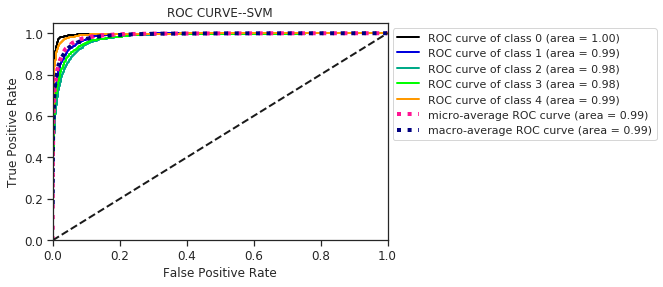

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob)
plt.title("ROC CURVE--SVM")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [0]:
knn_pca = neigh = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance', p=2)
knn_pca.fit(X_train,y_train)
y_pred_knn=knn_pca.predict(X_val)
y_pred_prob_knn=knn_pca.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

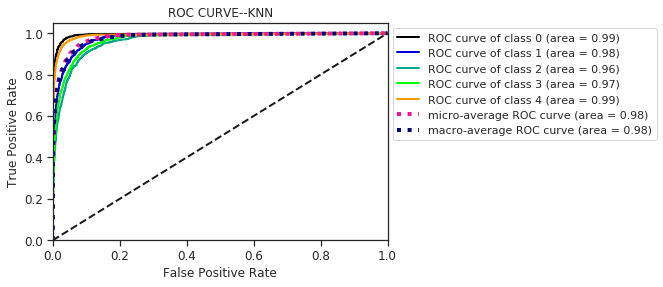

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob_knn)
plt.title("ROC CURVE--KNN")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [0]:
xgb_pca = XGBClassifier(n_estimators=200 ,max_depth=5, random_state = 42)
xgb_pca.fit(X_train,y_train)
y_pred_xgb=xgb_pca.predict(X_val)
y_pred_prob_xgb=xgb_pca.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

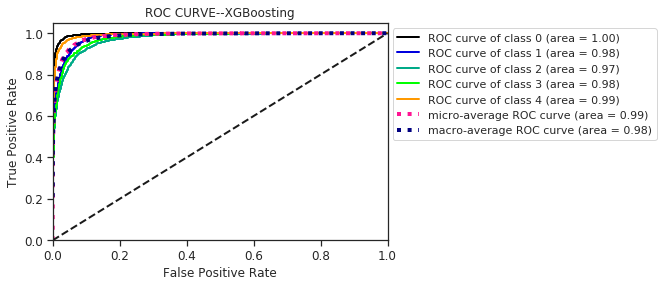

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob_xgb)
plt.title("ROC CURVE--XGBoosting")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [0]:
dec_tree_pca = tree.DecisionTreeClassifier(max_depth=65, random_state=42)
dec_tree_pca.fit(X_train, y_train)
y_pred_dt=dec_tree_pca.predict(X_val)
y_pred_prob_dt=dec_tree_pca.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

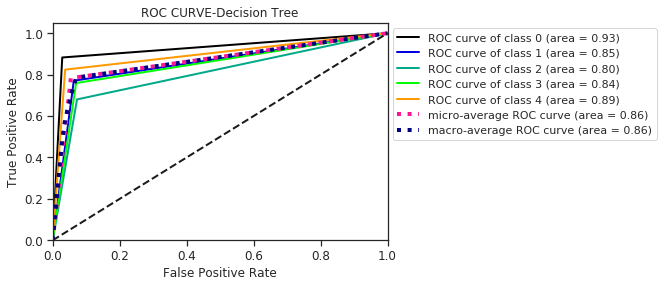

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob_dt)
plt.title("ROC CURVE-Decision Tree")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [0]:
Ran_F=RandomForestClassifier(n_estimators=150 ,max_depth=35, random_state = 42)
Ran_F.fit(X_train, y_train)
y_pred_rf=Ran_F.predict(X_val)
y_pred_prob_rf=Ran_F.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

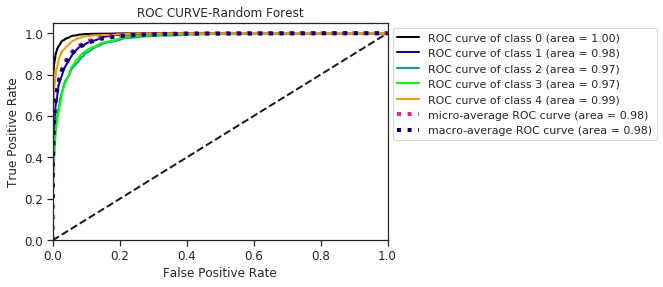

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob_rf)
plt.title("ROC CURVE-Random Forest")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [0]:
gb_tree_clf=GradientBoostingClassifier(random_state=42,n_estimators=200)
gb_tree_clf.fit(X_train, y_train)
y_pred_gb=gb_tree_clf.predict(X_val)
y_pred_prob_gb=gb_tree_clf.predict_proba(X_val)

/home/chitra/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 936x720 with 0 Axes>

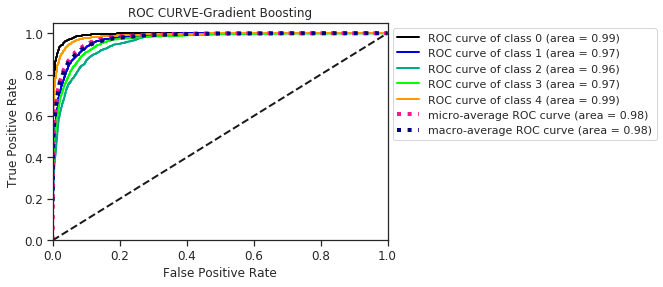

In [0]:
import scikitplot as skplt
plt.figure(figsize=(13,10))
skplt.metrics.plot_roc_curve(y_val,y_pred_prob_gb)
plt.title("ROC CURVE-Gradient Boosting")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

AUC (Area under ROC curve)
ROC (Receiver Operating Characteristic) is a performance metric, based on varying threshold values, for classification problems.ROC is a probability curve and AUC measure the separability. Higher the AUC, better the model,better the classification.

We used micro average to analysize the best classifier because Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

Considering our data, which is a multi class classification setup,micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes)

Analysing the ROC plots, we can come to a conclusion that SVM performs better when compared to all the other classifiers, as the micro average obtained for SVM is 0.99.

Considering AUC(area under the curve), for all the classes the AUC is close to 1, which implies less misclassification.

# Dimensionality Reduction Techniques

We have used Grid Search on the classifier we have found out to be the best (SVM Classifier).But Grid Search technique takes a lot of time to work on large dataset like fashion mnist so we need to apply Dimensionality reduction on the training dataset to reduce the number of features in the dataset, so that the time taken for grid search and prediction is reduced. 

There are two methods of dimensionality reduction: Linear methods,Non-linear methods
Due to memory and resource constraint so we have considered only linear dimensionality reduction methods.

#### Methods Considered in Linear dimensionality reduction:
**PCA**-Principal Component Analysis(Unsupervised): Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.The main goal of using PCA is to reduce the dimensionality of the given data set without losing any essential information about the image.

**LDA**-Linear Discriminant Analysis(Supervised) : It is similar to PCA but the only difference is that in addition to using the SVD solver it also tries to model the difference between the classes by using Bayes rule.

## PCA

In [0]:
%%time
pca_sel = PCA()
pca_sel.fit(X_train_mima)
X_train_PCA = pca_sel.transform(X_train_mima)

CPU times: user 2.49 s, sys: 188 ms, total: 2.68 s
Wall time: 4.6 s


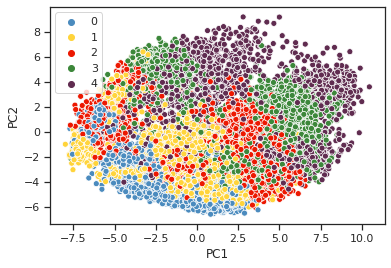

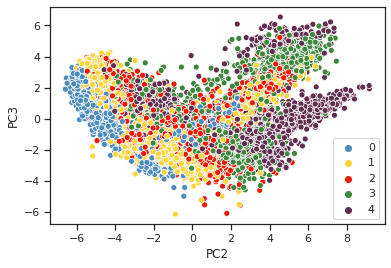

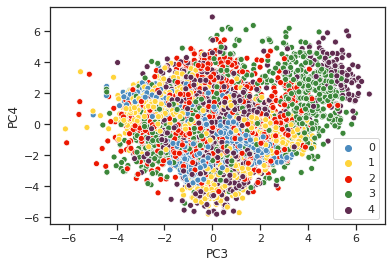

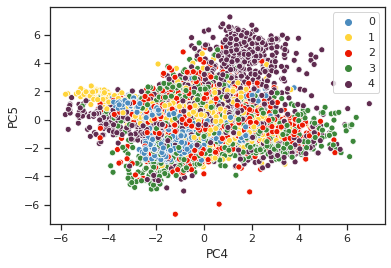

In [0]:
pal={0:"#4b8bbe",1:"#ffd43b",2:"#ec1801",3:"#3c873a",4:"#602c50"}
for i in range (len(X_train_PCA[:4])):
    x=X_train_PCA[:,i]
    y=X_train_PCA[:,i+1]
    xlabel = str(i+1)
    ylabel = str(i+2)
    sns.scatterplot(x,y,hue=y_train,palette=pal)
    plt.xlabel('PC'+xlabel)
    plt.ylabel('PC'+ylabel)
    plt.show()

## FDA

In [0]:
%%time
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_mima, y_train)
X_train_lda = lda.transform(X_train_mima)

CPU times: user 5.71 s, sys: 744 ms, total: 6.45 s
Wall time: 10 s


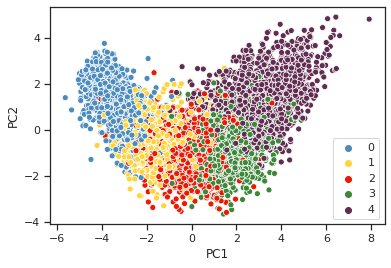

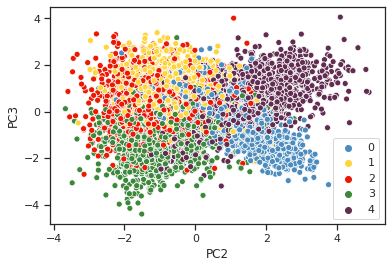

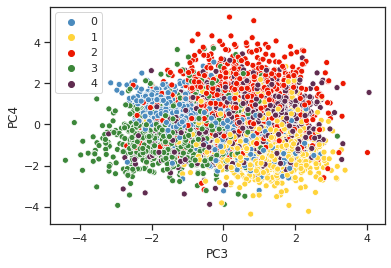

In [0]:
for i in range (len(X_train_lda[:3])):
    x=X_train_lda[:,i]
    y=X_train_lda[:,i+1]
    xlabel = str(i+1)
    ylabel = str(i+2)
    sns.scatterplot(x,y,hue=y_train,palette=pal)
    plt.xlabel('PC'+xlabel)
    plt.ylabel('PC'+ylabel)
    plt.show()

## Dimensionality Reduction Analysis-- Metric -- Visualization
We have performed PCA and LDA.Followed by which we have generated scatterplot inorder to visualize how well the class seperation is done.From the plots obtained we can say that PCA WORKS BETTER THAN LDA for Fashion MNIST Dataset



## Dimensionality Reduction Analysis-- Metric -- Time

#### PCA
CPU times: user 2.49 s, sys: 188 ms, total: 2.68 s<br>
Wall time: 4.6 s
#### LDA
CPU times: user 5.71 s, sys: 744 ms, total: 6.45 s<br>
Wall time: 10 s

When you observe the run time obtained from PCA & LDA,we can obviously state that PCA WORKS BETTER THAN LDA


Hence, we Performed PCA on the full data after splitting
Before that we tried to find the number of n_components to be chosen by plotting a screee plot

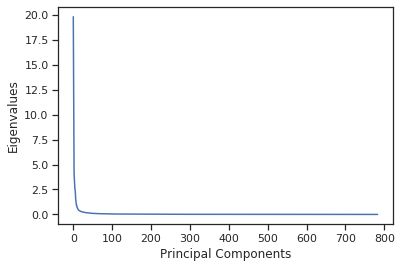

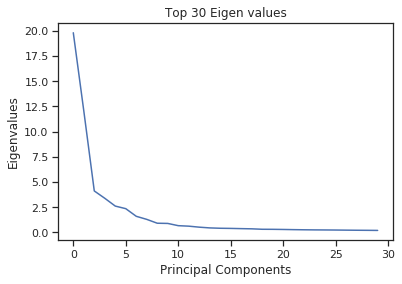

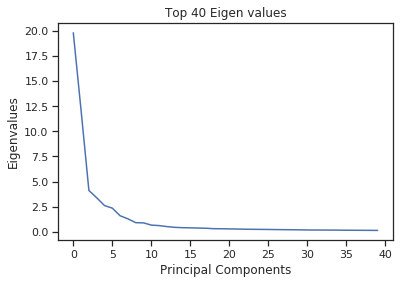

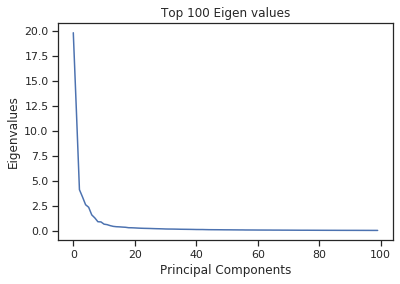

In [23]:
## Train Data with MinMax Normalization
covar_matrix = np.cov(X_train_mima_s.T)
eig_vals, eig_vecs = np.linalg.eig(covar_matrix)
i = eig_vals.argsort()[::-1]   
eigen_vals_sort = eig_vals[i]
eigen_vals_sort = np.asarray(eigen_vals_sort)
eigen_vals_sort_30 = np.asarray(eigen_vals_sort[:30])
eigen_vals_sort_40 = np.asarray(eigen_vals_sort[:40])
eigen_vals_sort_100 = np.asarray(eigen_vals_sort[:100])
eigen_vecs_sort = eig_vecs[:,i]
eigen_vecs_sort = np.asarray(eigen_vecs_sort)
plt.plot(eigen_vals_sort)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
plt.show()

plt.plot(eigen_vals_sort_30)
plt.title("Top 30 Eigen values")
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
plt.show()

plt.plot(eigen_vals_sort_40)
plt.xlabel("Principal Components")
plt.title("Top 40 Eigen values")
plt.ylabel("Eigenvalues")
plt.show()

plt.plot(eigen_vals_sort_100)
plt.xlabel("Principal Components")
plt.title("Top 100 Eigen values")
plt.ylabel("Eigenvalues")
plt.show()

In [27]:
Total = np.sum(eigen_vals_sort)
sum1 = 0
count_MinMax = 0
for i in range(len(eigen_vals_sort)):
    sum1 = sum1 + eigen_vals_sort[i]
    if (sum1/Total >= 0.90):
        count_MinMax = i
        break
count_MinMax

83

In [28]:
%%time
pca_sel = PCA(n_components=0.90)
pca_sel.fit(X_train_mima)
X_train_PCA_mima = pca_sel.transform(X_train_mima_s)
pca_val_s_mima= pca_sel.transform(X_val_mima_s)
pca_sel.n_components_

CPU times: user 1.34 s, sys: 109 ms, total: 1.45 s
Wall time: 778 ms


83

#### ANALYSIS OF SCREE PLOT AND PCA COMPONENT VALUE CONSIDERATION

We have constructed the covariance matrix for the training data set and using that we have computed the eigen values and vectors.The eigen values are sorted in descending order and the corresponding scree plots for top 100,40 and 30 eigen values are obtained correspondingly.From the scree plots we can observe and consider 20 to be a good cut off value for n_components.

When considering top 90 percent of the variance eliminating the outliers we are obtaining 83 components and from the scree plot obtained for the top 100 eigen values we can see components above 80 (top values) do not contribute much to the variance and hence can be considered as dummy variables.

Overall for PCA We can say that n_component value between 20 to 80 will yield a good dimensionality reduction for the classifers to train the model.

## Grid SearchCV to find the best C value

According to the analysis SVM was found to be the best classifier and PCA was found to be the best Dimentionality Reduction Technique.
Hence We applied grid search with cross validation= 3 Fold on SVM with PCA on MinMax normalized data to find the best  C value.
Cross validation value is considered 3 becuase for higher values it takes a lot of time to run.

In [24]:
%%time
pca_sel = PCA(n_components=20)
pca_sel.fit(X_train_mima_s)
X_train_PCA_mima_s= pca_sel.transform(X_train_mima_s)
X_val_PCA_mima_s= pca_sel.transform(X_val_mima_s)

CPU times: user 2.05 s, sys: 848 ms, total: 2.9 s
Wall time: 3.99 s


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [
   
    {'C': [10,15,20,25,30,35,40]},
    
]
    
svm_clf_grid_search = svm.SVC(random_state=42)

grid_search = GridSearchCV(svm_clf_grid_search, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_PCA_mima, y_train_s)
    


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10, 15, 20, 25, 30, 35, 40]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
grid_search.best_params_

{'C': 10}

# Applying the best parameters found 

In [43]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train_s)
pca_train = pca.transform(X_train_s)
pca_val = pca.transform(X_val_s)
pca_test= pca.transform(X_test)

CPU times: user 4.16 s, sys: 1.27 s, total: 5.43 s
Wall time: 8.12 s


In [45]:
%%time
clf = svm.SVC(kernel='rbf',C=10).fit(pca_train, y_train_s)

CPU times: user 50.5 s, sys: 75.8 ms, total: 50.6 s
Wall time: 50.8 s


In [41]:
%%time
pred = clf.predict(pca_val)
scores = accuracy_score(y_val_s,pred)

CPU times: user 345 ms, sys: 10 µs, total: 345 ms
Wall time: 343 ms


In [46]:
scores

0.8545

In [48]:
%%time
pred = clf.predict(pca_test)

CPU times: user 9.06 s, sys: 20 ms, total: 9.08 s
Wall time: 9.08 s


# Different Combinations of feature scaling + Dimensionality Reduction Techniques + KNN and SVM---For Tuning

In [0]:
%%time
#Feature Extraction--PCA with un-normalized data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_val = pca.transform(X_val)
pca_test= pca.transform(X_test)

CPU times: user 6.48 s, sys: 944 ms, total: 7.43 s
Wall time: 9.68 s


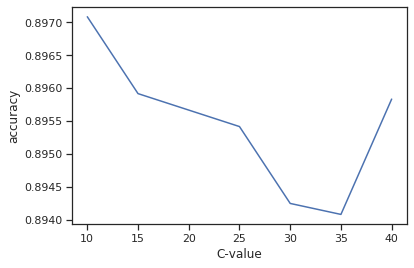

Mean Accuracies: [0.8970833333333333, 0.8959166666666667, 0.8956666666666667, 0.8954166666666666, 0.89425, 0.8940833333333333, 0.8958333333333334]
The highest accuracy: 89.70833333333333
The corresponding optimal c value: 10
CPU times: user 16min 18s, sys: 128 ms, total: 16min 18s
Wall time: 16min 18s


In [0]:
%%time
#Applying SVM Classifier-- PCA + un-normalized data
from sklearn.metrics import accuracy_score
from sklearn import svm
best_c =0
best_accuracy = 0
accuracy_list=[]
C_value = [10, 15, 20,25,30,35,40]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(pca_train, y_train)
    pred = clf.predict(pca_val)
    scores = accuracy_score(y_val,pred)
    accuracy_list.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy = scores.mean()
        best_c = i
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
#Testing the model on the best c
best_test_c = svm.SVC(C=best_c,kernel='rbf')
best_test_c.fit(pca_train,y_train)
pred1 = best_test_c.predict(pca_val)
pred = best_test_c.predict(pca_test)
accuracy_val = accuracy_score(y_val,pred1)
print('Mean Accuracies:',accuracy_list)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal c value:',best_c)

In [0]:
%%time
#Feature Extraction--PCA with min-max normalized data
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(X_train_norm)
pca_train_norm = pca.transform(X_train_norm)
pca_val_norm = pca.transform(X_val_norm)
pca_test_norm = pca.transform(X_test_norm)

CPU times: user 11.2 s, sys: 332 ms, total: 11.5 s
Wall time: 6.91 s


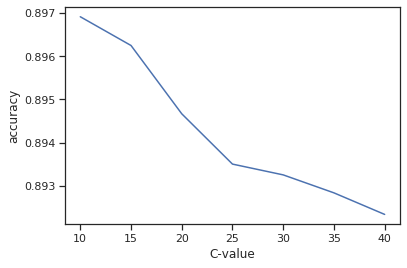

Mean Accuracies: [0.8969166666666667, 0.89625, 0.8946666666666667, 0.8935, 0.89325, 0.8928333333333334, 0.8923333333333333]
The highest accuracy for the validation set: 89.69166666666666
The corresponding optimal c value: 10
CPU times: user 20min 43s, sys: 1.94 s, total: 20min 45s
Wall time: 21min


In [0]:
%%time
#Applying SVM Classifier-- PCA + min-max normalized data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm
best_c =0
best_accuracy = 0
accuracy_list=[]
C_value = [10, 15, 20,25,30,35,40]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(pca_train_norm, y_train)
    pred = clf.predict(pca_val_norm)
    scores = accuracy_score(y_val,pred)
    accuracy_list.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy = scores.mean()
        best_c = i
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
#Testing the model on the best c
best_test_c = svm.SVC(C=best_c,kernel='rbf')
best_test_c.fit(pca_train_norm,y_train)
pred = best_test_c.predict(pca_val_norm)
pred1= best_test_c.predict(pca_test_norm)
accuracy_val = accuracy_score(y_val,pred)
print('Mean Accuracies:',accuracy_list)
print('The highest accuracy for the validation set:',best_accuracy*100)
print('The corresponding optimal c value:',best_c)

In [0]:
%%time
#Feature Extraction--LDA with Un-normalized data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_val_lda= lda.transform(X_val)

CPU times: user 15.1 s, sys: 2.89 s, total: 18 s
Wall time: 24.3 s


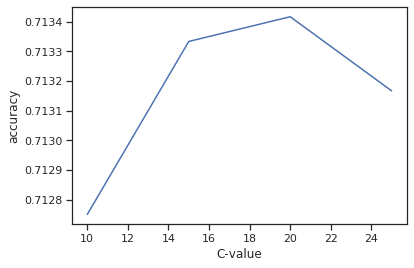

Mean Accuracies: [0.71275, 0.7133333333333334, 0.7134166666666667, 0.7131666666666666]
The highest accuracy: 71.34166666666667
The corresponding optimal c value: 20
CPU times: user 5min 19s, sys: 112 ms, total: 5min 19s
Wall time: 5min 20s


In [0]:
%%time
#Applying SVM Classifier-- LDA + Un-normalized data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm
best_c =0
best_accuracy = 0
accuracy_list=[]
C_value = [10, 15, 20,25]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(X_train_lda, y_train)
    pred = clf.predict(X_val_lda)
    scores = accuracy_score(y_val,pred)
    accuracy_list.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy = scores.mean()
        best_c = i
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
#Testing the model on the best c
best_test_c = svm.SVC(C=best_c,kernel='rbf')
best_test_c.fit(X_train_lda,y_train)
pred = best_test_c.predict(X_val_lda)
accuracy_val = accuracy_score(y_val,pred)
print('Mean Accuracies:',accuracy_list)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal c value:',best_c)

In [0]:
%%time
#Feature Extraction--LDA with normalized data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)
lda_train_norm = lda.transform(X_train_norm)
lda_val_norm= lda.transform(X_val_norm)

CPU times: user 14.7 s, sys: 2.72 s, total: 17.4 s
Wall time: 18.8 s


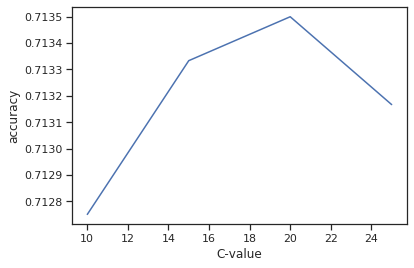

Mean Accuracies: [0.71275, 0.7133333333333334, 0.7135, 0.7131666666666666]
The highest accuracy: 71.35000000000001
The corresponding optimal c value: 20
CPU times: user 5min 34s, sys: 28.2 ms, total: 5min 34s
Wall time: 5min 35s


In [0]:
%%time
#Applying SVM Classifier-- LDA + normalized data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm
best_c =0
best_accuracy = 0
accuracy_list=[]
C_value = [10, 15, 20,25]
for i in C_value:
    clf = svm.SVC(kernel='rbf',C=i).fit(lda_train_norm, y_train)
    pred = clf.predict(lda_val_norm)
    scores = accuracy_score(y_val,pred)
    accuracy_list.append(scores.mean())
    if(scores.mean()>best_accuracy):
        best_accuracy = scores.mean()
        best_c = i
plt.plot(C_value,accuracy_list)
plt.xlabel('C-value')
plt.ylabel('accuracy')
plt.show()
#Testing the model on the best c
best_test_c = svm.SVC(C=best_c,kernel='rbf')
best_test_c.fit(lda_train_norm,y_train)
pred = best_test_c.predict(lda_val_norm)
accuracy_val = accuracy_score(y_val,pred)
print('Mean Accuracies:',accuracy_list)
print('The highest accuracy:',best_accuracy*100)
print('The corresponding optimal c value:',best_c)

In [0]:
%%time
#Applying KNN Classifier--PCA -- Un-normalized data and normalized data
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
n_neighborslist = [10,15,20,25,30]
col_names=['Uniform','Uniform_norm','Manhattan','Manhattan_norm','Euclidean','Euclidean_norm']
accarray = np.zeros((len(n_neighborslist),len(col_names)))
weight1 = [['uniform', 2],['distance',1], ['distance',2]]
acc=pd.DataFrame(accarray, columns=col_names)
for j in range(len(weight1)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh_norm = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh.fit(pca_train, y_train)
        neigh_norm.fit(pca_train_norm, y_train)
        y_pred = neigh.predict(pca_val) 
        y_pred_norm = neigh_norm.predict(pca_val_norm)
        accscore = accuracy_score(y_val, y_pred)
        accscore_norm = accuracy_score(y_val, y_pred_norm)
        if j==0:
            index=j
        acc.at[k,col_names[index]] = accscore
        acc.at[k,col_names[index+1]] = accscore_norm
    index=index+2

CPU times: user 20min 51s, sys: 716 ms, total: 20min 52s
Wall time: 20min 53s


In [0]:
acc[1:]

,Uniform,Uniform_norm,Manhattan,Manhattan_norm,Euclidean,Euclidean_norm
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.854667,0.857250,0.845417,0.847750,0.860583,0.863167
15,0.860500,0.862667,0.844083,0.848583,0.861083,0.863417
20,0.858167,0.858500,0.847250,0.847250,0.862167,0.862917
25,0.858667,0.859750,0.845500,0.847500,0.860667,0.862583
30,0.856000,0.856917,0.842500,0.848167,0.859333,0.861333


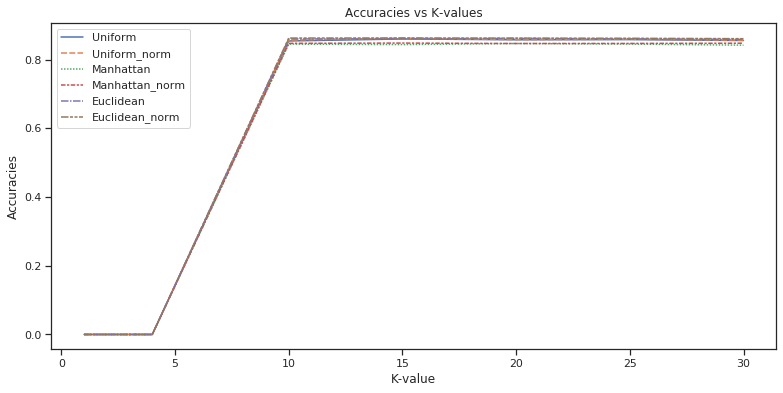

In [0]:
plt.figure(figsize =(13,6))
plt.title("Accuracies vs K-values")
plt.xlabel("K-value")
plt.ylabel("Accuracies")
s = sns.lineplot(data=acc[1:])

In [0]:
%%time
#Applying KNN Classifier--LDA -- Un-normalized data and normalized data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n_neighborslist = [10,15,20,25,30]
col_names=['Uniform','Uniform_norm','Manhattan','Manhattan_norm','Euclidean','Euclidean_norm']
accarray = np.zeros((len(n_neighborslist),len(col_names)))
weight1 = [['uniform', 2],['distance',1], ['distance',2]]
acc=pd.DataFrame(accarray, columns=col_names)
for j in range(len(weight1)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh_norm = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight1[j][0], p=weight1[j][1])
        neigh.fit(X_train_lda, y_train)
        neigh_norm.fit(lda_train_norm, y_train)
        y_pred = neigh.predict(X_val_lda) 
        y_pred_norm = neigh_norm.predict(lda_val_norm)
        accscore = accuracy_score(y_val, y_pred)
        accscore_norm = accuracy_score(y_val, y_pred_norm)
        if j==0:
            index=j
        acc.at[k,col_names[index]] = accscore
        acc.at[k,col_names[index+1]] = accscore_norm
    index=index+2

CPU times: user 7.98 s, sys: 4 ms, total: 7.99 s
Wall time: 7.99 s


In [0]:
acc[1:]

,Uniform,Uniform_norm,Manhattan,Manhattan_norm,Euclidean,Euclidean_norm
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.671333,0.671333,0.662333,0.662333,0.663667,0.663667
15,0.681333,0.681333,0.668167,0.668167,0.670333,0.670333
20,0.682000,0.682000,0.673500,0.673500,0.673917,0.673917
25,0.684083,0.684083,0.678333,0.678333,0.675917,0.675917
30,0.683500,0.683500,0.677917,0.677917,0.679417,0.679417


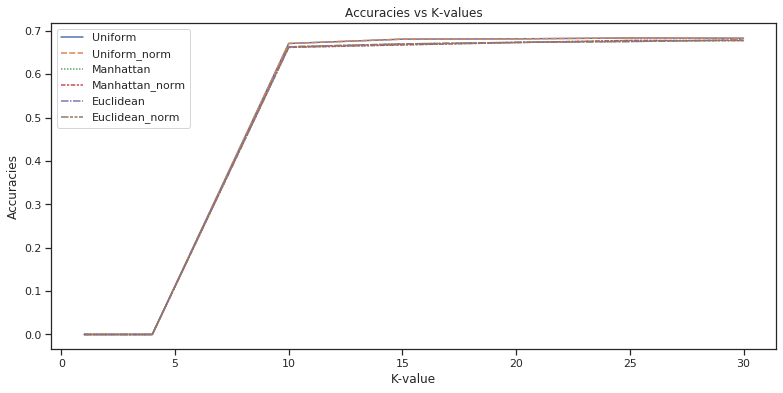

In [0]:
plt.figure(figsize =(13,6))
plt.title("Accuracies vs K-values")
plt.xlabel("K-value")
plt.ylabel("Accuracies")
s = sns.lineplot(data=acc[1:])

# FINAL MODEL

In [40]:
#Loading the data
train_data=pd.read_csv('train/train.csv')
train_data_copy=pd.read_csv('train/train.csv')
test_data=pd.read_csv('test/testX.csv')
train_data.drop(train_data.columns[[0]], axis = 1, inplace = True)
X_Data = train_data.iloc[:,1:]
Y_Data= train_data.iloc[:,:1]
X_test= test_data.iloc[:,1:]

time: 8.13 s


In [41]:
print(Y_Data.shape)
print(X_Data.shape)
print(X_test.shape)

(60000, 1)
(60000, 784)
(10000, 784)
time: 3.07 ms


In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_Data, Y_Data, test_size=0.2, random_state = 42)

time: 373 ms


In [43]:
#1d array
y_val=np.ravel(y_val)
y_train=np.ravel(y_train)

time: 1.56 ms


In [44]:
#Normalizing the data using minmax- normalization
X_train_mima = X_train.astype("float32")/255
X_val_mima= X_val.astype("float32")/255
X_test_mima=X_test.astype("float32")/255

time: 259 ms


PCA

In [45]:
#Feature Extraction--PCA with min-max normalized data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca.fit(X_train_mima)
pca_train_mima = pca.transform(X_train_mima)
pca_val_mima = pca.transform(X_val_mima)
pca_test_mima = pca.transform(X_test_mima)

time: 7.78 s


SVM

In [46]:
%%time
clf = svm.SVC(kernel='rbf',C=10,random_state = 42).fit(pca_train_mima, y_train)

CPU times: user 1min 36s, sys: 209 ms, total: 1min 36s
Wall time: 1min 36s
time: 1min 36s


In [47]:
%%time
pred = clf.predict(pca_val_mima)


CPU times: user 27.1 s, sys: 999 µs, total: 27.1 s
Wall time: 27.1 s
time: 27.1 s


In [48]:
%%time
pred_test = clf.predict(pca_test_mima)

CPU times: user 22.6 s, sys: 1.02 ms, total: 22.6 s
Wall time: 22.6 s
time: 22.6 s


In [49]:
svm_accscores = accuracy_score(y_val,pred)
svm_precision = precision_score(y_val, pred, average='weighted')
svm_recall = recall_score(y_val, pred, average='weighted')
svm_f1_score = f1_score(y_val, pred, average='weighted')

print("SVM Accuracy:",svm_accscores)
print("SVM Precision:",svm_precision)
print("SVM recall:",svm_recall)
print("SVM f1_score:",svm_f1_score)  

SVM Accuracy: 0.8969166666666667
SVM Precision: 0.8967157917620439
SVM recall: 0.8969166666666667
SVM f1_score: 0.8967992111356443
time: 25.3 ms


## 1.4 Explanation of your model (algorithms, design choices, numbers of parameters)
For choosing the best classifier,different metrics were considered such as ROC, runtime for training, run time for testing, accuracy score, precision score, recall and f1 Score
For choosing the best Dimentionality reduction -- time and visualization metrics were considered
Feature scaling -- minmax was considered for the final model as z-score did not produce a better accuracy when compared to minmax normalization.

C value in case of SVM was considered to be 10 after a grid searchCV was performed.

All of these implementations and results are displayed in the cells above.

After considering variable combinations--<br>

The best accuracy was obtained considering the following:<br>
1.Dimentionality Reduction Technique-PCA with n_components = 83, threshold = 90%<br>
2.Classifier- SVM with C value 10<br>
3.Feature Scaling - MinMax Normalization<br>

Best Metric values obtained:<br>

*SVM Accuracy: 0.8969166666666667*<br>
*SVM Precision: 0.8967157917620439*<br>
*SVM recall: 0.8969166666666667*<br>
*SVM f1_score: 0.8967992111356443*<br>




## 1.3. Kaggle Competition Score

We achieved **0.8900** as the best accuracy
To Achieve this, we normalized the data using MinMax Normalization and used SVM Classifier with PCA as the dimensionality reduction as deduced from the analysis as the best combination.
The parameters considered were n_components = 65 for PCA and SVM with C = 15 and kernel as 'rbf'

The accuracy for different team varied, it might be because of the following reasons<br>
-- The random seed used by PCA and SVM might be different<br>
-- We could have used any other feature extraction techniques to remove redudant features, which might have produces better accuracies as repeatative features would be noise and removal would increase the accuracy and result on a better model.

## 1.4. Results Analysis

#### Run Time Performance Analysis

**1. Run Time Analysis for Different Classifier using the sample data**

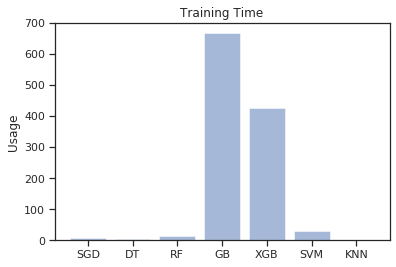

In [35]:
objects = ('SGD', 'DT', 'RF', 'GB', 'XGB', 'SVM','KNN')
y_pos = np.arange(len(objects))
performance = [6.44,3.25,12.5,667,425,29.7,1.99]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Training Time')
plt.show()

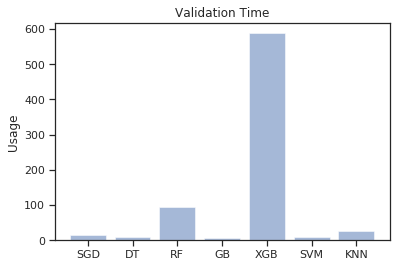

In [37]:
objects = ('SGD', 'DT', 'RF', 'GB', 'XGB', 'SVM','KNN')
y_pos = np.arange(len(objects))
performance = [16.4,8.32,94.5,5.93,588,10.2,26]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Validation Time')
plt.show()

Considering the 7 Classfiers we have tried, we can see that Knn takes the least time for training the data which is followed by Decision Tree Classifier. 
The time in case of KNN is less because Knn is a lazy learner, it does not learn , but memorizes the training dataset instead.
XGBoosting takes the maximum time to train the data.

**1. Run Time for Dimensionality Reduction Techniques**<br>
**PCA**<br>
CPU times: user 2.49 s, sys: 188 ms, total: 2.68 s<br>
Wall time: 4.6 s<br>

**LDA**<br>
CPU times: user 5.71 s, sys: 744 ms, total: 6.45 s<br>
Wall time: 10 s<br>

Runtime is less for PCA compared to LDA but there is not much of a difference.

**2. Comparision of different Parameters and algorithmns**<br>
We have already shown the parametric Analysis of each classifier alongside the code and got the optimal values for all the parameters.<br>
And the table below shows the best parameters<br>
**3.Evaluate your code with other metrics on the training data (by using some
of it as test data) and argue for the benefit of you approach.**

| ML Algorithm| Best Parameters | Accuracy | Precision | Recall | F1-Score 
|------|------|------|------|------|------|
|  SGD+No Normalization  |  | 47.9 | 57.5 | 57.5 | 47.6 
|  SGD+MinMAX  |  | 63.15 | 63.9 | 63.9 | 60.5 
|  SGD+z-Score |  | 60.7 | 61.5 | 61.5 | 60.9 
|  Decision Trees| max_depth=15  | 64.7| 65.4 | 65.4 | 65.02
|  Random Forests  | max_depth=35, <br> n_estimators=150 | 81.3| 81.8 | 81.5 | 81.6 
|  Gradient Boosting  | n_estimators=200  | 64.7 | 65.4 | 64.7 | 65.02 
|  XGBoosting  | max_depth= 5, <br> n_estimators=200  | 81.8 | 81.9 | 81.85 | 81.88 
|  SVM+No Normalization  | C-value=15  | 83.05 | 83.05 | 83.05 | 83.04 
|  SVM+MinMax  | C-value=10 | 83.55 | 83.51 | 83.55 | 83.53 
|  SVM+Z-score  | C-value=10  | 83.05 | 83.05 | 83.05 | 83.04 
|  KNN+Euclidean+minmax | n_neighbore, <br>p=2 | 80.35 | 80.4 | 80.35 | 80.2 

**From the above table we can deduce that SVM would be the best classifier among all the other classifiers considering different metrics**


**4. ROC Analysis for diffient Classifiers**<br>
We have already shown the ROC Analysis considering all the classifiers alongside the code while decing the best classifier.

# Conclusion
We can conclude that MInMAX Normalized data with PCA and SVM Classifier with C value = 10 is the best model obtained for Fashion MNIST with a Twist Problem